In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
import math
import statsmodels.api as sms
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "/kaggle/input/air-passengers/AirPassengers.csv" #For Kaggle
df = pd.read_csv(path)
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True) #convert from object to datetime
df = df.set_index(['Month'])



Shape of the data=  (144, 2)
Column datatypes= 
 Month          object
#Passengers     int64
dtype: object


In [3]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.isnull().sum()

#Passengers    0
dtype: int64

In [5]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


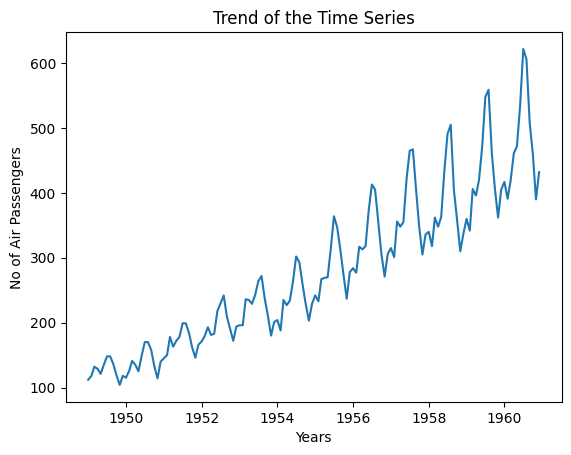

In [6]:
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')
plt.plot(df) # plotting


This shows upward trend

Decompostion to get individual components

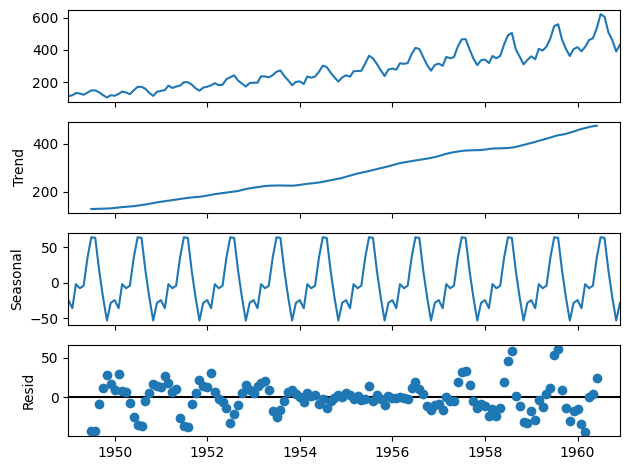

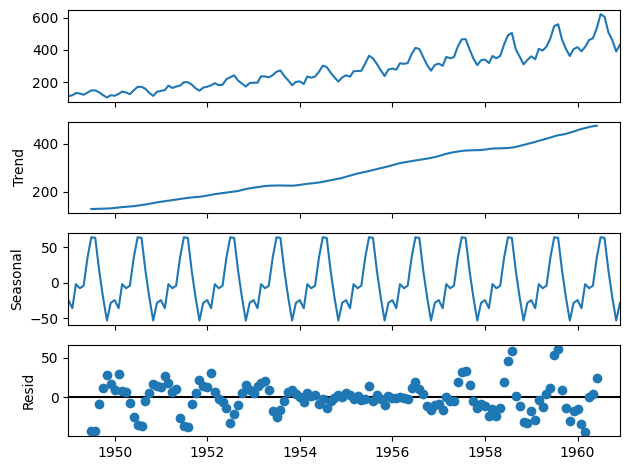

In [7]:
decompose= sm.tsa.seasonal_decompose(df,model ='additive') 
decompose.plot()

To show that it is non- stationary graph,perform rolling statistic and dicky-fuller test( p value greater than 0.05)

In [8]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adf_test(df['#Passengers'])

ADF Statistics: 0.8153688792060655
p- value: 0.9918802434376413
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [10]:
df['#Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [11]:
df['#Passengers'].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: #Passengers, Length: 144, dtype: float64

In [12]:
df['Passengers First Difference']= df['#Passengers']-df['#Passengers'].shift(1)

In [13]:
df.head()

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [14]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700025
p- value: 0.05421329028382508
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [16]:
df.head()

,#Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [17]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246846
p- value: 2.732891850014516e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [18]:
### 12 months 
## Use Techniques Differencing
df['Passengers 12 Difference']=df['#Passengers']-df['#Passengers'].shift(12)

In [19]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics: -3.38302072649248
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

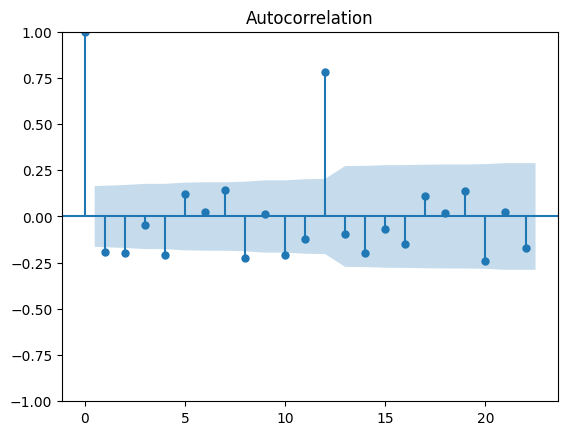

In [21]:
acf = plot_acf(df["Passengers Second Difference"].dropna())

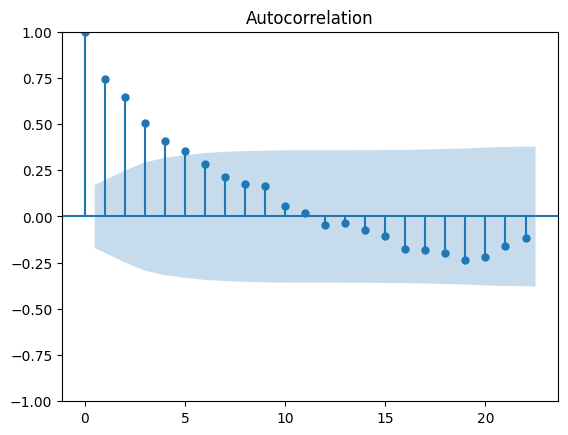

In [22]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())


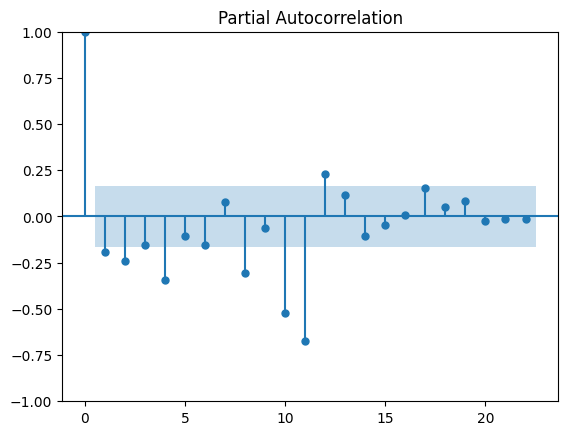

In [23]:
result = plot_pacf(df["Passengers Second Difference"].dropna())

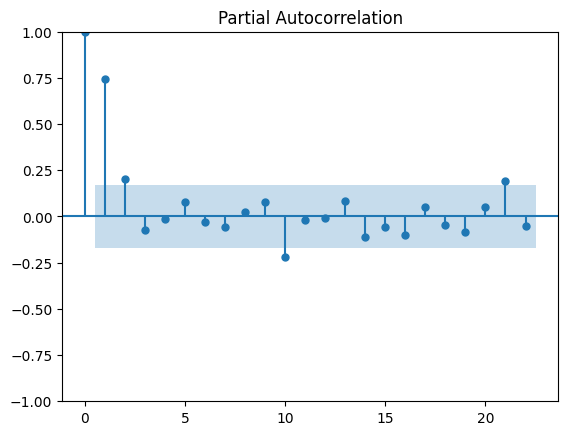

In [24]:
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [25]:
### split train and test data
df

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [26]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [27]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [28]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [29]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [30]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [31]:
train_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [32]:
model_ARIMA=ARIMA(train_data['#Passengers'],order=(0,2,0))

In [33]:
model_Arima_fit=model_ARIMA.fit()


In [34]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                Wed, 24 Jan 2024   AIC                            773.584
Time:                        17:23:52   BIC                            775.991
Sample:                    01-01-1949   HQIC                           774.550
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5859    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

For ARIMA(p,d,q) find p and q thorugh the pacf and acf plots respectively:

In [35]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [36]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [37]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

In [38]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

In [39]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

<Axes: ylabel='Density'>

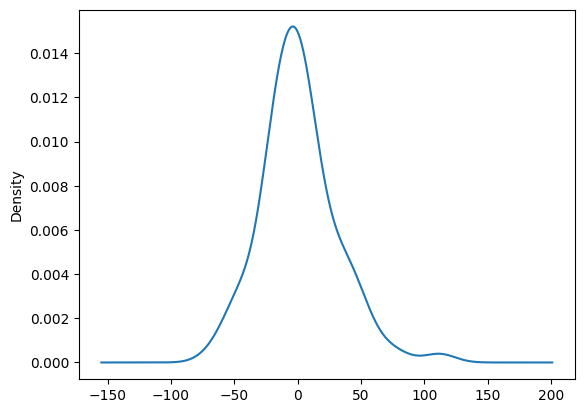

In [40]:
model_Arima_fit.resid.plot(kind='kde')

In [41]:
test_data['Predicted_ARIMA']=pred

<Axes: xlabel='Month'>

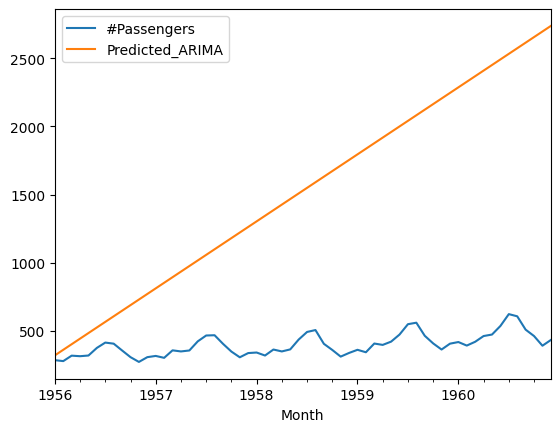

In [42]:
test_data[['#Passengers','Predicted_ARIMA']].plot()

In [43]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,6),seasonal_order=(0,1,0,12))

In [45]:
model_SARIMA_fit=model_SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18893D+00    |proj g|=  5.88717D-02

At iterate    5    f=  3.17735D+00    |proj g|=  2.01945D-02

At iterate   10    f=  3.16931D+00    |proj g|=  1.23578D-02

At iterate   15    f=  3.16060D+00    |proj g|=  2.38310D-02

At iterate   20    f=  3.15865D+00    |proj g|=  1.04919D-02

At iterate   25    f=  3.15791D+00    |proj g|=  1.10491D-03

At iterate   30    f=  3.15780D+00    |proj g|=  1.28410D-03

At iterate   35    f=  3.15779D+00    |proj g|=  5.79681D-04

At iterate   40    f=  3.15768D+00    |proj g|=  2.80114D-03

At iterate   45    f=  3.15740D+00    |proj g|=  1.56751D-03

At iterate   50    f=  3.15739D+00    |proj g|=  1.39340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [46]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 6)x(0, 1, [], 12)   Log Likelihood                -265.221
Date:                             Wed, 24 Jan 2024   AIC                            550.442
Time:                                     17:23:55   BIC                            573.208
Sample:                                 01-01-1949   HQIC                           559.505
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4660      2.035      0.229      0.819      -3.523       4.455
ar.L2          0.8465      0.343      2.471      0.013       0.175       1.518
ar.L3         -0.3408      1.725     -0.198      0.843      -3.721       3.039
ma.L1          0.3150      2.497      0.126      0.900      -4.579       5.209
ma.L2         -0.4463      1.559     -0.286      0.775      -3.502       2.609
ma.L3         -0.1221      0.470     -0.260      0.795      -1.043       0.798
ma.L4         -0.1615      0.600     -0.269      0.788      -1.338       1.015
ma.L5          0.2268      0.462      0.491      0.623      -0.678       1.131
ma.L6          0.0320      0.312      0.103      0.918      -0.579       0.643
sigma2        87.6920    108.636      0.807      0.420    -125.231     300.615
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.82
Prob(Q):                              0.88   Prob(JB):                         0.24
Heteroskedasticity (H):               2.03   Skew:                             0.47
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
test_data.tail()

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,2574.0
1960-09-01,508,-98.0,-82.0,45.0,2615.0
1960-10-01,461,-47.0,51.0,54.0,2656.0
1960-11-01,390,-71.0,-24.0,28.0,2697.0
1960-12-01,432,42.0,113.0,27.0,2738.0


In [48]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [49]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

<Axes: xlabel='Month'>

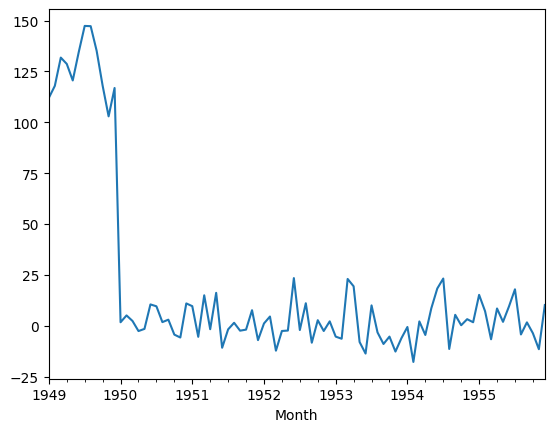

In [50]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

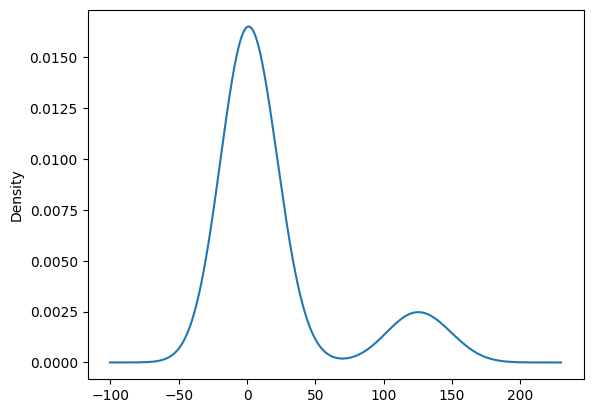

In [51]:
model_SARIMA_fit.resid.plot(kind='kde')

In [52]:
test_data['Predicted_SARIMA']=pred_Sarima

In [53]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317,40.0,47.0,50.0,401.0,NaN
1956-04-01,313,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318,5.0,9.0,48.0,483.0,NaN
1956-06-01,374,56.0,51.0,59.0,524.0,NaN
1956-07-01,413,39.0,-17.0,49.0,565.0,403.428801
1956-08-01,405,-8.0,-47.0,58.0,606.0,385.187714
1956-09-01,355,-50.0,-42.0,43.0,647.0,349.532948


<Axes: xlabel='Month'>

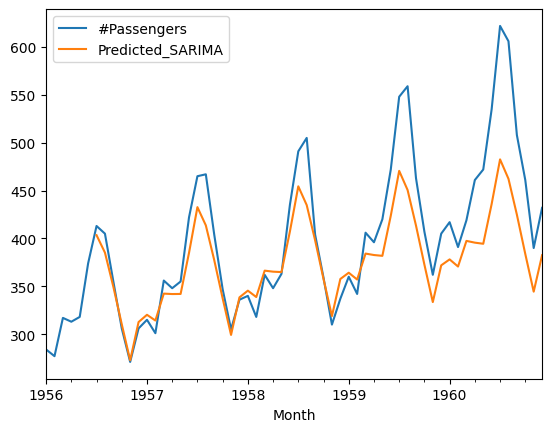

In [54]:
test_data[['#Passengers','Predicted_SARIMA']].plot()

Extra info:

1) 'ols' stands for ordinary least squares. It's a method used to estimate the partial autocorrelation function (PACF) in time series analysis. The PACF is computed by fitting a linear regression model to the time series against its lagged values, and the coefficients of this model represent the partial autocorrelation values. 'ols' is a common and computationally efficient method for this purpose.

2)The nlags parameter in the functions acf and pacf is used to specify the number of lags to compute.By setting nlags=20, for example, you are calculating the acf and pacf up to a lag of 20 time units.

3)The value 1.96 corresponds to the critical value for a 95% confidence interval assuming a normal distribution (which is common in statistics).

4)plt.subplot(121) is like dividing your plotting area into a grid with 1 row and 2 columns. The (121) means you're selecting the first slot in that grid.
So, when you plot something after plt.subplot(121), it goes into the left part of this divided area. It's a way of saying, "I want to show two plots side by side, and I'm working on the left one now."
If you had used plt.subplot(122) instead, you would be working on the right part of the divided area.

 p =2,q=2 (value where graph crosses upper confidence limit)